In [29]:
import pandas as pd
import numpy as np
df = pd.read_csv('hotel_bookings.csv')
df_names = df.copy()

In [30]:
df.drop(columns=['agent','company',"reservation_status"],inplace=True)
df['country'].fillna(inplace=True,value=df['country'].mode)
df['children'].fillna(inplace=True,value=0)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
type(df['reservation_status_date'])

pandas.core.series.Series

In [31]:
def convertirMesEscritoNumero(df,columna_a_editar):
    month_mapping = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April': 4,
        'May': 5,
        'June': 6,
        'July': 7,
        'August': 8,
        'September': 9,
        'October': 10,
        'November': 11,
        'December': 12
    }
    df[columna_a_editar] = df[columna_a_editar].apply(lambda x: month_mapping[x.capitalize()] if x.capitalize() in month_mapping else None)

convertirMesEscritoNumero(df,'arrival_date_month')

In [32]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
# df['reservation_status_date'].value_counts()
# df['reservation_status_date'].dt.day

In [33]:
def funcion_agrupoacion_cut(labels,bins,df_columna):
    # Agrupación de una columna de data sets
        # [0, 2), [2, 3), [3, ∞) Estos serán los limites que ajusto
    if(len(labels) == len(bins)-1):
        return pd.cut(df_columna, bins=bins, labels=labels, right=False)
    else:
        print("\x1b[1;31m",'\nEl datos labels o bins está mal estructurado',"\033[0;m")
        print("\t Ejemplo: labels = ['0', '10', '20', '30+']  bins = [0, 10, 20, 30, float('inf')]\n") 

In [34]:
# print(df['adults'].value_counts().sort_index())
df['adults'] = funcion_agrupoacion_cut(labels = ['1', '2', '3'], bins = [0, 2, 3, float('inf')], df_columna=df['adults'])
# df['adults'].value_counts().sort_index()

In [35]:
# print(df['adr'].value_counts().sort_index())
df['adr'] = funcion_agrupoacion_cut(labels = ['1', '2', '3', '4'], bins = [0, 50, 100, 150, float('inf')], df_columna=df['adr'])
# df['adr'].value_counts().sort_index()

In [36]:
# print(df['children'].value_counts().sort_index())
df['children'] = funcion_agrupoacion_cut(labels = ['0', '1', '2', '3'], bins = [0, 1, 2, 3, float('inf')], df_columna=df['children'])
# df['children'].value_counts().sort_index()

In [37]:
# print(df['babies'].value_counts().sort_index())
df['babies'] = funcion_agrupoacion_cut(labels = ['0', '1', '2'], bins = [0, 1, 2, float('inf')], df_columna=df['babies'])
# df['babies'].value_counts().sort_index()

In [38]:
def categorico_a_numerico_mapeo(columna, dft):
    # print(dft[columna].value_counts().sort_index())
    columnas = dft[columna].unique()
    mapeo = {}
    let = 1
    for col in columnas:
        mapeo[col] = let
        let+=1

    dft[columna] = dft[columna].replace(mapeo)
    # print(df[columna].value_counts().sort_index())
    return dft

In [39]:
df = categorico_a_numerico_mapeo('customer_type',df)
df = categorico_a_numerico_mapeo("deposit_type",df)
df = categorico_a_numerico_mapeo("assigned_room_type",df)
df = categorico_a_numerico_mapeo("reserved_room_type",df)
df = categorico_a_numerico_mapeo("meal",df)
df = categorico_a_numerico_mapeo("market_segment",df)
df = categorico_a_numerico_mapeo("distribution_channel",df)
df = categorico_a_numerico_mapeo("country",df)
# print(df['country'].value_counts())

In [40]:
df['country'] = funcion_agrupoacion_cut(bins=[0, 100, 1000, float('inf')], labels=['1', '2', '3'], df_columna=df['country'].astype("int"))
# df['country'].value_counts()

In [41]:
df['hotel'] = np.where(df["hotel"] == "City Hotel", 0, 1)

# **El dataset no está balanceado**
Ya que tenemos muy pocos casos de fraude por lo que el modelo puede no ser capaz de diferenciar entre fraude y correcto uso de la tarjeta.

In [42]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [43]:
cancelado = df[df.is_canceled == 1]
no_cancelado = df[df.is_canceled == 0]
print(cancelado.shape)
print(no_cancelado.shape)

(44224, 29)
(75166, 29)


In [44]:
no_cancelado = df[df['is_canceled'] == 0].sample(n=len(cancelado)+324, random_state=42)
print(no_cancelado.shape)

(44548, 29)


In [45]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [46]:
df = pd.concat([cancelado, no_cancelado], axis=0)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
8,1,1,85,2015,7,27,1,0,3,2,...,2,2,0,1,0,1,2,0,1,2015-05-06
9,1,1,75,2015,7,27,1,0,3,2,...,3,3,0,1,0,1,3,0,0,2015-04-22
10,1,1,23,2015,7,27,1,0,4,2,...,4,4,0,1,0,1,3,0,0,2015-06-23
27,1,1,60,2015,7,27,1,2,5,2,...,4,4,0,1,0,1,3,0,2,2015-05-11
32,1,1,96,2015,7,27,1,2,8,2,...,4,4,0,1,0,1,3,0,2,2015-05-29


In [47]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               1
required_car_parking_spaces       0
total_of_special_requests   

In [48]:
# Como hay un nulo, en la columna adr por asegurar creo una funcion bucle que llena los pequeños nulos con la moda
### IMPORTANTE, SOLO CUANDO SE GENERA UNO O DOS NULOS, NO MUCHOS!!!
# df = df['is_canceled']
def moda_pocos_nulos(col,dft):
    if df[col].isnull().sum() != 0:
        df[col].fillna(df[col].mode().iloc[0])

# No funcionaba la funcion, asi que he echo lo siguiente:
df.dropna(subset=['adr'],inplace=True)


In [49]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# **Normalizamos y separamos los datos**

In [50]:
y = df['is_canceled']
X = df.drop(columns=['is_canceled', 'reservation_status_date'], axis=1)

y.value_counts()

is_canceled
0    44547
1    44224
Name: count, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(71016, 27) (17755, 27) (71016,) (17755,)


# Ahora a hacer Modelos


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear un pipeline con RobustScaler, PCA, Backward Elimination y RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('pca', PCA()),              
    ('feature_selection', RFE(estimator=RandomForestClassifier(), n_features_to_select=5)),  
    ('classifier', RandomForestClassifier())  
])



  <h1>Explicación del Pipeline</h1>

  <p>
    En aprendizaje automático, un <strong>pipeline</strong> es una secuencia de pasos que se aplican secuencialmente para procesar y modelar datos.
  </p>

  <h2>1. Robust Scaler</h2>
  <p>
    <strong>Robust Scaler</strong> es un paso de preprocesamiento que normaliza los datos, haciéndolos robustos frente a valores atípicos. Esto es útil para mantener la escala de las características en presencia de datos atípicos.
  </p>

  <h2>2. PCA (Análisis de Componentes Principales)</h2>
  <p>
    El paso de <strong>PCA</strong> reduce la dimensionalidad de los datos al extraer las características más importantes. Esto facilita el manejo de conjuntos de datos grandes y complejos al preservar la información relevante.
  </p>

  <h2>3. RFE (Eliminación Recursiva de Características)</h2>
  <p>
    <strong>RFE</strong> es una técnica de selección de características que utiliza un clasificador (Random Forest en este caso) para eliminar de manera recursiva las características menos importantes. Ayuda a simplificar el modelo y mejora la eficiencia computacional.
  </p>

  <h2>4. Random Forest Classifier</h2>
  <p>
    <strong>Random Forest Classifier</strong> es un modelo de clasificación que utiliza múltiples árboles de decisión para realizar predicciones. Es conocido por su robustez y capacidad para manejar conjuntos de datos complejos.
  </p>


In [57]:
pipeline.fit(X=X_train,y=y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('pca', PCA()),
                ('feature_selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=5)),
                ('classifier', RandomForestClassifier())])

# OJO!!! Ha tardado 20 minutos este modelo

In [58]:
# Accuracy en training data
Y_pred = pipeline.predict(X_train)
training_data_accuracy = accuracy_score( y_pred = Y_pred , y_true = y_train )
print('Accuracy on Training Data: ',training_data_accuracy)

# Accuracy en test data
y_pred = pipeline.predict(X_test)
test_data_accuracy = accuracy_score( y_pred = y_pred, y_true = y_test )
print('Accuracy on Test Data: ',test_data_accuracy)

Accuracy on Training Data:  0.9905795876985468
Accuracy on Test Data:  0.8170656153196283


In [59]:
# métricas de clasificación
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8848
           1       0.84      0.78      0.81      8907

    accuracy                           0.82     17755
   macro avg       0.82      0.82      0.82     17755
weighted avg       0.82      0.82      0.82     17755



[[7569 1279]
 [1969 6938]]


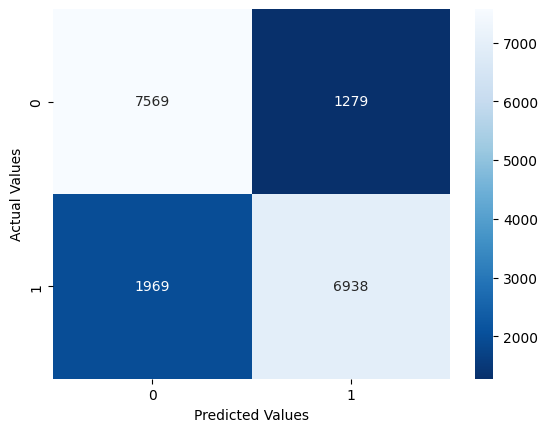

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix( y_true = y_test , y_pred = y_pred )
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues_r' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Matriz de Confusión</title>
</head>
<body>
  <p>La matriz de confusión generalmente tiene cuatro términos:</p>

  <ul>
    <li><strong>Verdaderos positivos (TP):</strong> 7569</li>
    <li><strong>Falsos positivos (FP):</strong> 1279</li>
    <li><strong>Falsos negativos (FN):</strong> 1969</li>
    <li><strong>Verdaderos negativos (TN):</strong> 6938</li>
  </ul>

  <p>Interpretación detallada:</p>

  <ul>
    <li><strong>Verdaderos positivos (TP):</strong> Este valor (7569) representa la cantidad de instancias que fueron correctamente clasificadas como positivas por el modelo. En términos simples, son los casos en los que el modelo predijo correctamente que la instancia pertenece a la clase positiva.</li>
    <li><strong>Falsos positivos (FP):</strong> Este valor (1279) indica la cantidad de instancias que fueron incorrectamente clasificadas como positivas por el modelo. Es decir, el modelo predijo que eran positivas, pero en realidad pertenecían a la clase negativa.</li>
    <li><strong>Falsos negativos (FN):</strong> Este valor (1969) representa la cantidad de instancias que fueron incorrectamente clasificadas como negativas por el modelo. Es decir, el modelo predijo que eran negativas, pero en realidad pertenecían a la clase positiva.</li>
    <li><strong>Verdaderos negativos (TN):</strong> Este valor (6938) indica la cantidad de instancias que fueron correctamente clasificadas como negativas por el modelo. Son los casos en los que el modelo predijo correctamente que la instancia pertenece a la clase negativa.</li>
  </ul>
</body>
</html>


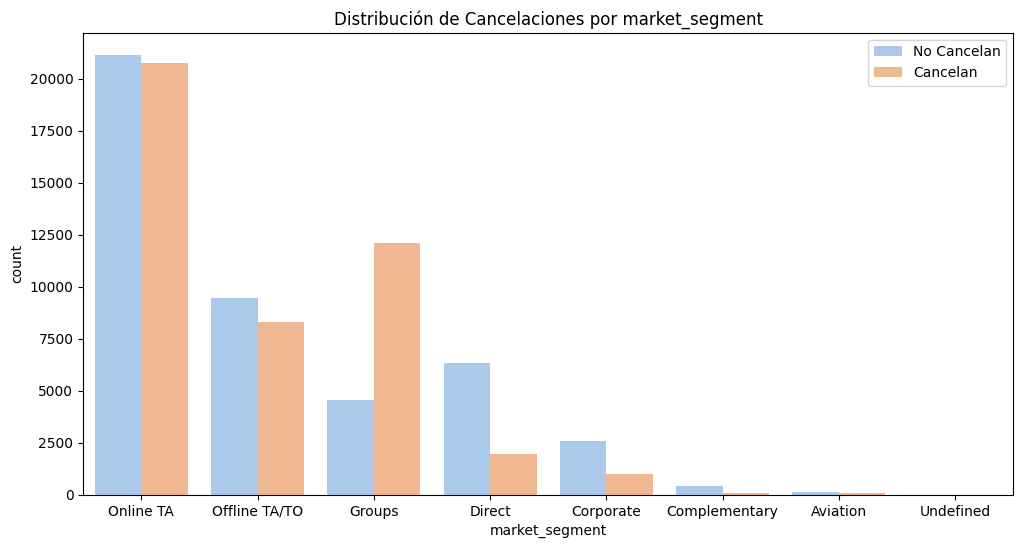

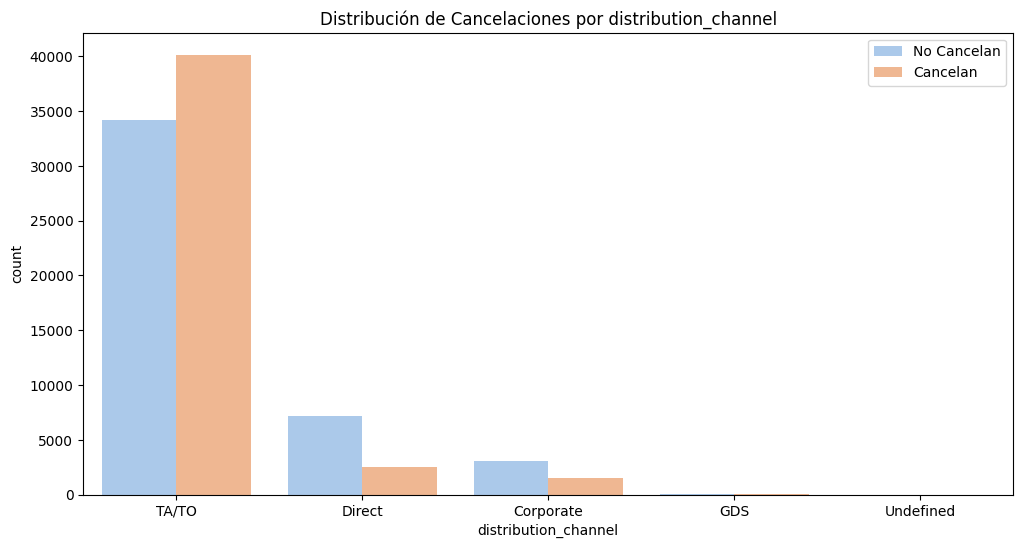

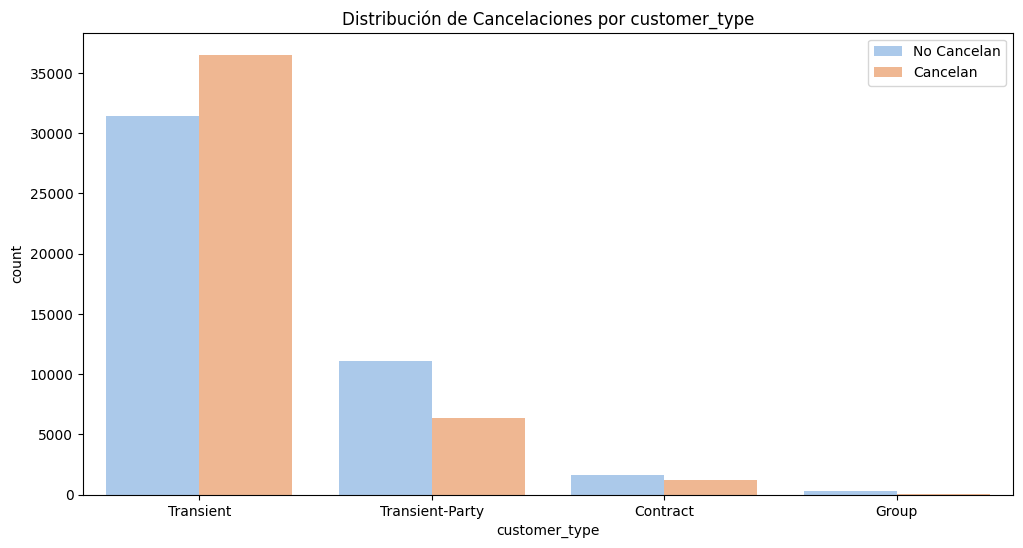

In [60]:
# Selecciona solo las columnas categóricas
categorical_cols = df.select_dtypes(include=['category']).columns

import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['market_segment', 'distribution_channel', 'customer_type']

# Gráfico de barras para columnas que yo selecciono
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
                    # Nombres Originales # Col Objetivo en y        # Colores           # Ordeno las columnas de mayor a menor
    ax = sns.countplot(x=df_names[col], hue='is_canceled', data=df, palette='pastel',order=df_names[col].value_counts().index)
    plt.title(f'Distribución de Cancelaciones por {col}')

# Etiquetas de la leytenda
    handles, labels = ax.get_legend_handles_labels()
    labels = ['No Cancelan', 'Cancelan']
    ax.legend(handles, labels)

    plt.show()
# Si la barra es más alta en la categoría "Cancelado" (por ejemplo, si hay más barras azules), 
    # significa que hay más reservas canceladas en esa categoría en particular.

# Si la barra es más baja en la categoría "Cancelado" (por ejemplo, si hay más barras naranjas), 
    # significa que hay menos reservas canceladas en esa categoría.